In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

In [2]:
import statsmodels.api as sm

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, train_test_split, KFold, GridSearchCV
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.metrics import mean_squared_error, r2_score


In [3]:
pd.set_option('display.max_columns', None) # displays all pd columns

# Try with original housing data

In [4]:
housing = pd.read_csv('../../Ames_HousePrice.csv', index_col=0)

In [5]:
real_estate = pd.read_csv('../../Ames Real Estate Data.csv', index_col=0)

In [6]:
price = housing["SalePrice"]

In [7]:
int_df = housing.select_dtypes(include='int64')
int_df

,PID,GrLivArea,SalePrice,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,1stFlrSF,2ndFlrSF,LowQualFinSF,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
1,909176150,856,126000,30,7890,6,6,1939,1950,856,0,0,1,0,2,1,4,1,0,0,0,0,166,0,0,3,2010
2,905476230,1049,139500,120,4235,5,5,1984,1984,1049,0,0,2,0,2,1,5,0,0,105,0,0,0,0,0,2,2009
3,911128020,1001,124900,30,6060,5,9,1930,2007,1001,0,0,1,0,2,1,5,0,154,0,42,86,0,0,0,11,2007
4,535377150,1039,114000,70,8146,4,8,1900,2003,717,322,0,1,0,2,1,6,0,0,0,168,0,111,0,0,5,2009
5,534177230,1665,227000,60,8400,8,6,2001,2001,810,855,0,2,1,3,1,6,0,0,45,0,0,0,0,0,11,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,903205040,952,121000,30,8854,6,6,1916,1950,952,0,0,1,0,2,1,4,1,0,98,0,0,40,0,0,5,2009
760,905402060,1733,139600,20,13680,3,5,1955,1955,1733,0,0,2,0,4,1,8,1,0,0,0,0,0,0,0,6,2009
761,909275030,2002,145000,90,6270,5,6,1949,1950,1001,1001,0,2,0,4,2,8,0,0,0,0,0,0,0,0,8,2007
762,907192040,1842,217500,60,8826,7,5,2000,2000,985,857,0,2,1,3,1,7,1,193,96,0,0,0,0,0,7,2007


In [8]:
int_df.isnull().sum().sort_values(axis=0, ascending=False)

PID              0
BedroomAbvGr     0
MoSold           0
MiscVal          0
PoolArea         0
ScreenPorch      0
3SsnPorch        0
EnclosedPorch    0
OpenPorchSF      0
WoodDeckSF       0
Fireplaces       0
TotRmsAbvGrd     0
KitchenAbvGr     0
HalfBath         0
GrLivArea        0
FullBath         0
LowQualFinSF     0
2ndFlrSF         0
1stFlrSF         0
YearRemodAdd     0
YearBuilt        0
OverallCond      0
OverallQual      0
LotArea          0
MSSubClass       0
SalePrice        0
YrSold           0
dtype: int64

In [9]:
x = sm.add_constant(int_df)
model = sm.OLS(np.log(price), x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     1546.
Date:                Mon, 30 May 2022   Prob (F-statistic):               0.00
Time:                        10:14:26   Log-Likelihood:                 2422.4
No. Observations:                2580   AIC:                            -4791.
Df Residuals:                    2553   BIC:                            -4633.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            10.1540      2.921      3.477

In [10]:
rm_pvalues = results.pvalues[results.pvalues > 0.05]
rm_pvalues

PID             0.313170
MSSubClass      0.068097
2ndFlrSF        0.727850
LowQualFinSF    0.855165
HalfBath        0.339207
TotRmsAbvGrd    0.445227
WoodDeckSF      0.291387
OpenPorchSF     0.506901
3SsnPorch       0.099312
PoolArea        0.669934
MiscVal         0.770867
MoSold          0.837923
YrSold          0.103881
dtype: float64

In [11]:
int_df.drop(columns=rm_pvalues.index, inplace=True)

In [12]:
y = int_df.SalePrice

In [13]:
int_df.drop(columns='SalePrice', inplace=True)

In [14]:
# Partition the dataset in train + validation sets
X_train, X_test, y_train, y_test = train_test_split(int_df, y, test_size = 0.3, random_state = 0)
print("X_train : " + str(X_train.shape))
print("X_test : " + str(X_test.shape))
print("y_train : " + str(y_train.shape))
print("y_test : " + str(y_test.shape))

X_train : (1806, 13)
X_test : (774, 13)
y_train : (1806,)
y_test : (774,)


# Try with Group's Train-Test Split

In [15]:
#pull in group's train-test split
X_train = pd.read_csv('../../group train-test split/X_train42.csv')
X_test = pd.read_csv('../../group train-test split/X_test42.csv')
y_train = pd.read_csv('../../group train-test split/y_train42.csv')
y_test = pd.read_csv('../../group train-test split/y_test42.csv')


In [16]:
X_train.isnull().sum().sort_values(axis=0, ascending=False)

GrLivArea                 0
Exterior2nd__Wd Sdng      0
MasVnrType__BrkCmn        0
MasVnrType__BrkFace       0
MasVnrType__NA            0
                         ..
Neighborhood__Sawyer      0
Neighborhood__SawyerW     0
Neighborhood__Somerst     0
Neighborhood__StoneBr     0
SaleCondition__Partial    0
Length: 230, dtype: int64

In [17]:
print("X_train : " + str(X_train.shape))
print("X_test : " + str(X_test.shape))
print("y_train : " + str(y_train.shape))
print("y_test : " + str(y_test.shape))

X_train : (2046, 230)
X_test : (512, 230)
y_train : (2046, 1)
y_test : (512, 1)


In [18]:
# Define models
model_linear = LinearRegression()
model_ridge = Ridge(alpha = 1)
model_lasso = Lasso(alpha = .00008)
model_net = ElasticNet(alpha = .00007)
model_tree = DecisionTreeRegressor()
model_rf = RandomForestRegressor()
model_xgb = XGBRegressor()

In [19]:
# combine R^2 score and RMSE into one print function to reduce redundancy, blah
def print_score(test, pred, model): 
    """
    Create func to print R^2 and RMSE
    """
    r2_ = r2_score(test, pred)
    rmse_ = np.sqrt(mean_squared_error(test, pred))
    
    print(f"- Model: {model}")
    print(f"R²: {r2_}")
    print(f"RMSE: {rmse_}\n")

In [20]:
def train_test_score(model, xtrain, ytrain, xtest, ytest, inv_trans=None):
    """
    Create func to print train and test scores
    """
    

    ytrain_pred = model.predict(xtrain)
    ytest_pred = model.predict(xtest)
    
    if inv_trans:
        ytrain_pred = inv_trans(ytrain_pred)
        ytest_pred = inv_trans(ytest_pred)
    
    print("Train Score:")
    print_score(ytrain, ytrain_pred, model)
    print("Test Score:")
    print_score(ytest, ytest_pred, model)


## Linear Model

In [21]:
model_linear.fit(X_train, y_train)
y_pred_linear = model_linear.predict(X_test)
print_score(y_test, y_pred_linear, "Linear Regression")

- Model: Linear Regression
R²: 0.9182864163090891
RMSE: 21496.1411933915



In [22]:
train_test_score(model_linear, X_train, y_train, X_test, y_test)

Train Score:
- Model: LinearRegression()
R²: 0.9371207742775772
RMSE: 18835.32967974836

Test Score:
- Model: LinearRegression()
R²: 0.9182864163090891
RMSE: 21496.1411933915



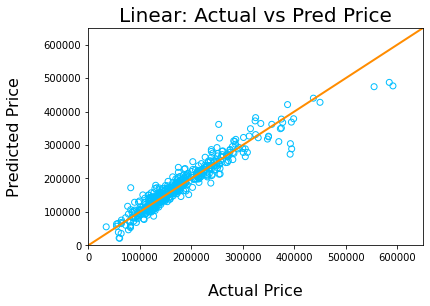

In [23]:
plt.figure()
plt.title("Linear: Actual vs Pred Price", fontsize=20)
plt.scatter(y_test, y_pred_linear,
            color="deepskyblue", marker="o", facecolors="none")
plt.plot([0, 650000], [0, 650000], "darkorange", lw=2)
plt.xlim(0, 650000)
plt.ylim(0, 650000)
plt.xlabel("\nActual Price", fontsize=16)
plt.ylabel("Predicted Price\n", fontsize=16)
plt.show()

In [24]:
model_linear.fit(X_train, np.log(y_train))
logy_pred_linear = model_linear.predict(X_test)
print_score(y_test, np.exp(logy_pred_linear), "Log Linear Inputs")

- Model: Log Linear Inputs
R²: 0.9330641593898489
RMSE: 19455.515302592987



In [25]:
train_test_score(model_linear, X_train, y_train, X_test, y_test, np.exp)

Train Score:
- Model: LinearRegression()
R²: 0.9476409513916823
RMSE: 17187.610640374187

Test Score:
- Model: LinearRegression()
R²: 0.9330641593898489
RMSE: 19455.515302592987



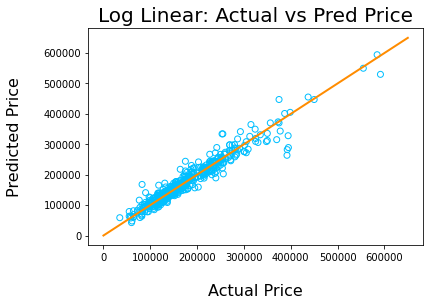

In [26]:
plt.figure()
plt.title("Log Linear: Actual vs Pred Price", fontsize=20)
plt.scatter(y_test, np.exp(logy_pred_linear),
            color="deepskyblue", marker="o", facecolors="none")
plt.plot([0, 650000], [0, 650000], "darkorange", lw=2)
plt.xlabel("\nActual Price", fontsize=16)
plt.ylabel("Predicted Price\n", fontsize=16)
plt.show()

In [27]:
# log1p y linear model
model_linear.fit(X_train, np.log1p(y_train))
log1py_pred_linear = model_linear.predict(X_test)
print_score(y_test, np.expm1(logy_pred_linear), "Log1p Linear Inputs")

- Model: Log1p Linear Inputs
R²: 0.9330641483124972
RMSE: 19455.51691245981



## Ridge Model

In [28]:
model_ridge.fit(X_train, y_train)
y_pred_ridge = model_ridge.predict(X_test)
print_score(y_test, y_pred_ridge, "Ridge")

- Model: Ridge
R²: 0.9210841889360748
RMSE: 21124.935391458483



In [29]:
train_test_score(model_ridge, X_train, y_train, X_test, y_test)

Train Score:
- Model: Ridge(alpha=1)
R²: 0.9358258284094735
RMSE: 19028.290327488063

Test Score:
- Model: Ridge(alpha=1)
R²: 0.9210841889360748
RMSE: 21124.935391458483



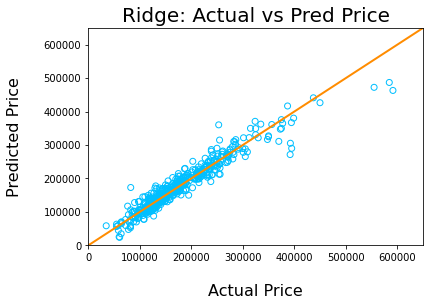

In [30]:
plt.figure()
plt.title("Ridge: Actual vs Pred Price", fontsize=20)
plt.scatter(y_test, y_pred_ridge,
            color="deepskyblue", marker="o", facecolors="none")
plt.plot([0, 650000], [0, 650000], "darkorange", lw=2)
plt.xlim(0, 650000)
plt.ylim(0, 650000)
plt.xlabel("\nActual Price", fontsize=16)
plt.ylabel("Predicted Price\n", fontsize=16)
plt.show()

In [31]:
model_ridge.fit(X_train, np.log(y_train))
logy_pred_ridge = model_ridge.predict(X_test)
print_score(y_test, np.exp(logy_pred_ridge), "Log Ridge Inputs")

- Model: Log Ridge Inputs
R²: 0.9351512959830791
RMSE: 19149.790530732



In [32]:
train_test_score(model_ridge, X_train, y_train, X_test, y_test, np.exp)

Train Score:
- Model: Ridge(alpha=1)
R²: 0.9440444368365783
RMSE: 17768.111425825926

Test Score:
- Model: Ridge(alpha=1)
R²: 0.9351512959830791
RMSE: 19149.790530732



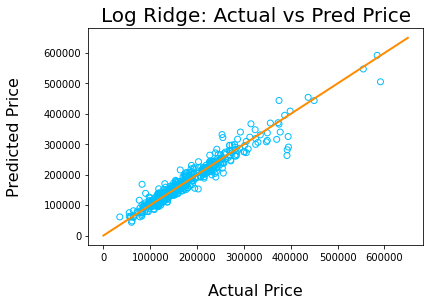

In [33]:
plt.figure()
plt.title("Log Ridge: Actual vs Pred Price", fontsize=20)
plt.scatter(y_test, np.exp(logy_pred_ridge),
            color="deepskyblue", marker="o", facecolors="none")
plt.plot([0, 650000], [0, 650000], "darkorange", lw=2)
plt.xlabel("\nActual Price", fontsize=16)
plt.ylabel("Predicted Price\n", fontsize=16)
plt.show()

In [34]:
# log1p y ridge model
model_ridge.fit(X_train, np.log1p(y_train))
log1py_pred_ridge = model_ridge.predict(X_test)
print_score(y_test, np.expm1(logy_pred_ridge), "Log1p Ridge Inputs")

- Model: Log1p Ridge Inputs
R²: 0.9351511594248405
RMSE: 19149.81069351187



## Lasso Model

In [35]:
# lasso model
model_lasso.fit(X_train, y_train)
y_pred_lasso = model_lasso.predict(X_test)
print_score(y_test, y_pred_lasso, "Lasso")

- Model: Lasso
R²: 0.918311816491203
RMSE: 21492.799959818934



In [36]:
train_test_score(model_lasso, X_train, y_train, X_test, y_test)

Train Score:
- Model: Lasso(alpha=8e-05)
R²: 0.9371207568143749
RMSE: 18835.33229527954

Test Score:
- Model: Lasso(alpha=8e-05)
R²: 0.918311816491203
RMSE: 21492.799959818934



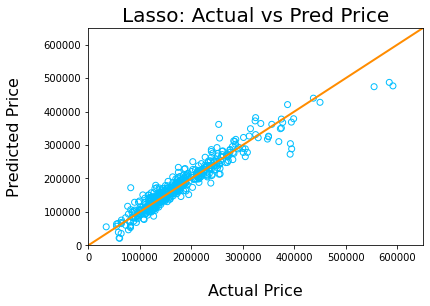

In [37]:
# plot lasso model
plt.figure()
plt.title("Lasso: Actual vs Pred Price", fontsize=20)
plt.scatter(y_test, y_pred_lasso,
            color="deepskyblue", marker="o", facecolors="none")
plt.plot([0, 650000], [0, 650000], "darkorange", lw=2)
plt.xlim(0, 650000)
plt.ylim(0, 650000)
plt.xlabel("\nActual Price", fontsize=16)
plt.ylabel("Predicted Price\n", fontsize=16)
plt.show()

In [38]:
# log y lasso model
model_lasso.fit(X_train, np.log(y_train))
logy_pred_lasso = model_lasso.predict(X_test)
print_score(y_test, np.exp(logy_pred_lasso), "Log Lasso Inputs")

- Model: Log Lasso Inputs
R²: 0.9359614968306254
RMSE: 19029.788578568023



In [39]:
train_test_score(model_lasso, X_train, y_train, X_test, y_test, np.exp)

Train Score:
- Model: Lasso(alpha=8e-05)
R²: 0.9433426760723911
RMSE: 17879.182706758053

Test Score:
- Model: Lasso(alpha=8e-05)
R²: 0.9359614968306254
RMSE: 19029.788578568023



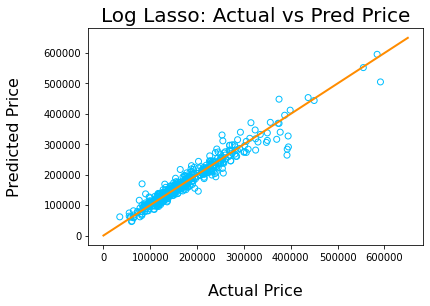

In [40]:
# plot log y lasso model
plt.figure()
plt.title("Log Lasso: Actual vs Pred Price", fontsize=20)
plt.scatter(y_test, np.exp(logy_pred_lasso),
            color="deepskyblue", marker="o", facecolors="none")
plt.plot([0, 650000], [0, 650000], "darkorange", lw=2)
plt.xlabel("\nActual Price", fontsize=16)
plt.ylabel("Predicted Price\n", fontsize=16)
plt.show()

In [41]:
# log1p y lasso model
model_lasso.fit(X_train, np.log1p(y_train))
log1py_pred_lasso = model_lasso.predict(X_test)
print_score(y_test, np.expm1(logy_pred_lasso), "Log1p Lasso Inputs")

- Model: Log1p Lasso Inputs
R²: 0.9359613339578544
RMSE: 19029.812778324977



## ElasticNet Model

In [69]:
# net model
model_net.fit(X_train, y_train)
y_pred_net = model_net.predict(X_test)
print_score(y_test, y_pred_net, "ElasticNet")

- Model: ElasticNet
R²: 0.9188607545350779
RMSE: 21420.46328452892



In [70]:
train_test_score(model_net, X_train, y_train, X_test, y_test)

Train Score:
- Model: ElasticNet(alpha=7e-05)
R²: 0.9370999187640927
RMSE: 18838.45303170407

Test Score:
- Model: ElasticNet(alpha=7e-05)
R²: 0.9188607545350779
RMSE: 21420.46328452892



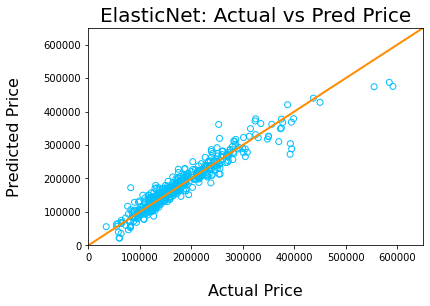

In [43]:
# plot net model
plt.figure()
plt.title("ElasticNet: Actual vs Pred Price", fontsize=20)
plt.scatter(y_test, y_pred_net,
            color="deepskyblue", marker="o", facecolors="none")
plt.plot([0, 650000], [0, 650000], "darkorange", lw=2)
plt.xlim(0, 650000)
plt.ylim(0, 650000)
plt.xlabel("\nActual Price", fontsize=16)
plt.ylabel("Predicted Price\n", fontsize=16)
plt.show()

In [44]:
# log y net model
model_net.fit(X_train, np.log(y_train))
logy_pred_net = model_net.predict(X_test)
print_score(y_test, np.exp(logy_pred_net), "Log ElasticNet Inputs")

- Model: Log ElasticNet Inputs
R²: 0.9360027734441305
RMSE: 19023.654676281694



In [45]:
train_test_score(model_net, X_train, y_train, X_test, y_test, np.exp)

Train Score:
- Model: ElasticNet(alpha=7e-05)
R²: 0.9458338898548708
RMSE: 17481.691735099237

Test Score:
- Model: ElasticNet(alpha=7e-05)
R²: 0.9360027734441305
RMSE: 19023.654676281694



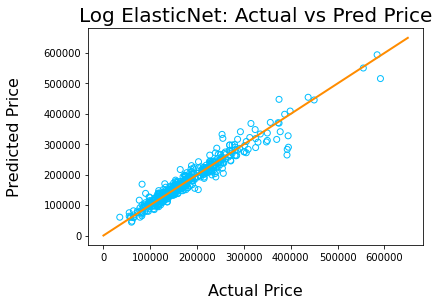

In [46]:
# plot log y net model
plt.figure()
plt.title("Log ElasticNet: Actual vs Pred Price", fontsize=20)
plt.scatter(y_test, np.exp(logy_pred_net),
            color="deepskyblue", marker="o", facecolors="none")
plt.plot([0, 650000], [0, 650000], "darkorange", lw=2)
plt.xlabel("\nActual Price", fontsize=16)
plt.ylabel("Predicted Price\n", fontsize=16)
plt.show()

In [47]:
# log1p y net model
model_net.fit(X_train, np.log1p(y_train))
log1py_pred_net = model_net.predict(X_test)
print_score(y_test, np.expm1(logy_pred_net), "Log1p ElasticNet Inputs")

- Model: Log1p ElasticNet Inputs
R²: 0.9360026473144446
RMSE: 19023.673422769138



## Decision Tree Model

In [48]:
# tree model
model_tree.fit(X_train, y_train)
y_pred_tree = model_tree.predict(X_test)
print_score(y_test, y_pred_tree, "Decision Tree")

- Model: Decision Tree
R²: 0.7614804159215947
RMSE: 36726.1495945466



In [49]:
train_test_score(model_tree, X_train, y_train, X_test, y_test)

Train Score:
- Model: DecisionTreeRegressor()
R²: 1.0
RMSE: 0.0

Test Score:
- Model: DecisionTreeRegressor()
R²: 0.7614804159215947
RMSE: 36726.1495945466



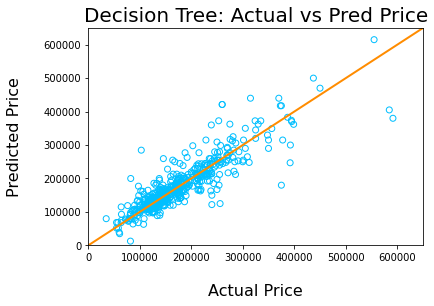

In [50]:
# plot tree model
plt.figure()
plt.title("Decision Tree: Actual vs Pred Price", fontsize=20)
plt.scatter(y_test, y_pred_tree,
            color="deepskyblue", marker="o", facecolors="none")
plt.plot([0, 650000], [0, 650000], "darkorange", lw=2)
plt.xlim(0, 650000)
plt.ylim(0, 650000)
plt.xlabel("\nActual Price", fontsize=16)
plt.ylabel("Predicted Price\n", fontsize=16)
plt.show()

In [51]:
# log y tree model
model_tree.fit(X_train, np.log(y_train))
logy_pred_tree = model_tree.predict(X_test)
print_score(y_test, np.exp(logy_pred_tree), "Log Decision Tree Inputs")

- Model: Log Decision Tree Inputs
R²: 0.7479925725322146
RMSE: 37750.26874262784



In [52]:
train_test_score(model_tree, X_train, y_train, X_test, y_test, np.exp)

Train Score:
- Model: DecisionTreeRegressor()
R²: 1.0
RMSE: 9.889052083171459e-11

Test Score:
- Model: DecisionTreeRegressor()
R²: 0.7479925725322146
RMSE: 37750.26874262784



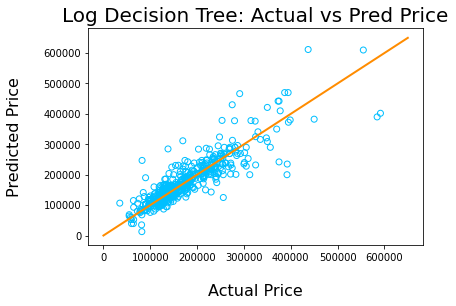

In [53]:
# plot log y tree model
plt.figure()
plt.title("Log Decision Tree: Actual vs Pred Price", fontsize=20)
plt.scatter(y_test, np.exp(logy_pred_tree),
            color="deepskyblue", marker="o", facecolors="none")
plt.plot([0, 650000], [0, 650000], "darkorange", lw=2)
plt.xlabel("\nActual Price", fontsize=16)
plt.ylabel("Predicted Price\n", fontsize=16)
plt.show()

In [54]:
# log1p y tree model
model_tree.fit(X_train, np.log1p(y_train))
log1py_pred_tree = model_tree.predict(X_test)
print_score(y_test, np.expm1(logy_pred_tree), "Log1p Decision Tree Inputs")

- Model: Log1p Decision Tree Inputs
R²: 0.7479928791054788
RMSE: 37750.24578055336



## Random Forest

In [55]:
# randomforest model
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)
print_score(y_test, y_pred_rf, "Random Forest")

- Model: Random Forest
R²: 0.895396598710267
RMSE: 24321.271753049234



In [56]:
train_test_score(model_rf, X_train, y_train, X_test, y_test)

Train Score:
- Model: RandomForestRegressor()
R²: 0.9848872848823172
RMSE: 9234.02150020602

Test Score:
- Model: RandomForestRegressor()
R²: 0.895396598710267
RMSE: 24321.271753049234



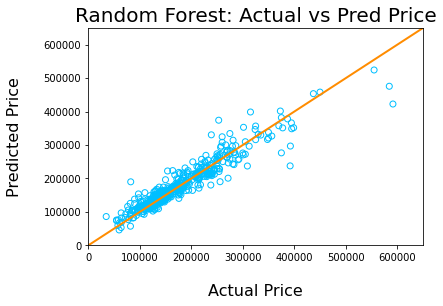

In [57]:
# plot randomforest model
plt.figure()
plt.title("Random Forest: Actual vs Pred Price", fontsize=20)
plt.scatter(y_test, y_pred_rf,
            color="deepskyblue", marker="o", facecolors="none")
plt.plot([0, 650000], [0, 650000], "darkorange", lw=2)
plt.xlim(0, 650000)
plt.ylim(0, 650000)
plt.xlabel("\nActual Price", fontsize=16)
plt.ylabel("Predicted Price\n", fontsize=16)
plt.show()

In [58]:
# log y randomforest model
model_rf.fit(X_train, np.log(y_train))
logy_pred_rf = model_rf.predict(X_test)
print_score(y_test, np.exp(logy_pred_rf), "Log Random Forest Inputs")

- Model: Log Random Forest Inputs
R²: 0.8866941776520807
RMSE: 25312.75937796415



In [59]:
train_test_score(model_rf, X_train, y_train, X_test, y_test, np.exp)

Train Score:
- Model: RandomForestRegressor()
R²: 0.9823387822354646
RMSE: 9982.284797733788

Test Score:
- Model: RandomForestRegressor()
R²: 0.8866941776520807
RMSE: 25312.75937796415



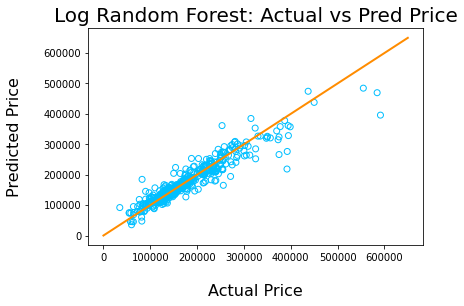

In [60]:
# plot log y randomforest model
plt.figure()
plt.title("Log Random Forest: Actual vs Pred Price", fontsize=20)
plt.scatter(y_test, np.exp(logy_pred_rf),
            color="deepskyblue", marker="o", facecolors="none")
plt.plot([0, 650000], [0, 650000], "darkorange", lw=2)
plt.xlabel("\nActual Price", fontsize=16)
plt.ylabel("Predicted Price\n", fontsize=16)
plt.show()

In [61]:
# log1p y randomforest model
model_rf.fit(X_train, np.log1p(y_train))
log1py_pred_rf = model_rf.predict(X_test)
print_score(y_test, np.expm1(logy_pred_rf), "Log1p Random Forest Inputs")

- Model: Log1p Random Forest Inputs
R²: 0.8866934303994174
RMSE: 25312.842846736017



## XGBoost

In [62]:
# xgboost model
model_xgb.fit(X_train, y_train)
y_pred_xgb = model_xgb.predict(X_test)
print_score(y_test, y_pred_xgb, "XGBoost")

- Model: XGBoost
R²: 0.8945776451133607
RMSE: 24416.29332724231



In [63]:
train_test_score(model_xgb, X_train, y_train, X_test, y_test)

Train Score:
- Model: XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)
R²: 0.9982478183318253
RMSE: 3144.193023217424

Test Score:
- Model: XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eva

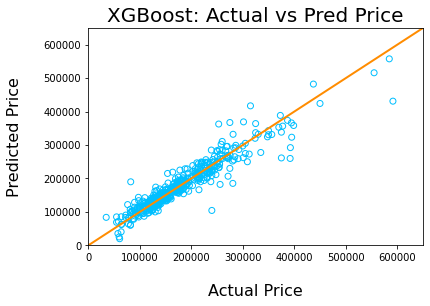

In [64]:
# plot XGBoost model
plt.figure()
plt.title("XGBoost: Actual vs Pred Price", fontsize=20)
plt.scatter(y_test, y_pred_xgb,
            color="deepskyblue", marker="o", facecolors="none")
plt.plot([0, 650000], [0, 650000], "darkorange", lw=2)
plt.xlim(0, 650000)
plt.ylim(0, 650000)
plt.xlabel("\nActual Price", fontsize=16)
plt.ylabel("Predicted Price\n", fontsize=16)
plt.show()

In [65]:
# log y xgboost model
model_xgb.fit(X_train, np.log(y_train))
logy_pred_xgb = model_xgb.predict(X_test)
print_score(y_test, np.exp(logy_pred_xgb), "Log XGBoost Inputs")

- Model: Log XGBoost Inputs
R²: 0.9245535143779092
RMSE: 20655.36551139439



In [66]:
train_test_score(model_xgb, X_train, y_train, X_test, y_test, np.exp)

Train Score:
- Model: XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)
R²: 0.997833640244736
RMSE: 3496.10866759248

Test Score:
- Model: XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_

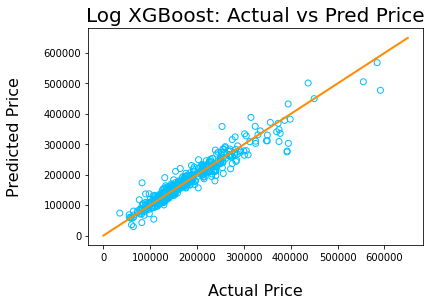

In [67]:
# plot log y xgboost model
plt.figure()
plt.title("Log XGBoost: Actual vs Pred Price", fontsize=20)
plt.scatter(y_test, np.exp(logy_pred_xgb),
            color="deepskyblue", marker="o", facecolors="none")
plt.plot([0, 650000], [0, 650000], "darkorange", lw=2)
plt.xlabel("\nActual Price", fontsize=16)
plt.ylabel("Predicted Price\n", fontsize=16)
plt.show()

In [68]:
# log1p y xgboost model
model_xgb.fit(X_train, np.log1p(y_train))
log1py_pred_xgb = model_xgb.predict(X_test)
print_score(y_test, np.expm1(logy_pred_xgb), "Log1p XGBoost Inputs")

- Model: Log1p XGBoost Inputs
R²: 0.9245533380207797
RMSE: 20655.389652471422

